In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn import model_selection
from sklearn import metrics
#from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt 

In [2]:
colnames = ['preg', 'glu', 'bp', 'sft', 'ins', 'bmi', 'dpf', 'age', 'outcome']
prima_df = pd.read_csv("pima-indians-diabetes.data",names=colnames)

In [3]:
X =  prima_df.drop("outcome", axis=1)
y =  prima_df.pop("outcome")

In [4]:
Dt_model=DecisionTreeClassifier(criterion='entropy',random_state=0)#fully grown tree (high bias error and var error)

In [5]:
Dt_model2=DecisionTreeClassifier(max_depth=4,criterion='entropy',random_state=0)

In [6]:
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)
knn=KNeighborsClassifier(n_neighbors=1)
Bg_model = BaggingClassifier(base_estimator=knn,n_estimators=51,random_state=0)

In [7]:
#Bootstrapped sampled multiple decision tree(with the hope of controlling bias error)
Rf_model = RandomForestClassifier(n_estimators=40,criterion='entropy',random_state=0)
basedt=DecisionTreeClassifier(criterion='entropy',max_depth=1,random_state=0)
Ad_model= AdaBoostClassifier(n_estimators=8,base_estimator=basedt,random_state=0)
Gd_model=GradientBoostingClassifier(n_estimators=150,random_state=0)
BoostedRF=AdaBoostClassifier(base_estimator=Rf_model,n_estimators=100,random_state=0)

In [8]:
models = []
models.append(('Unconstrained Decision Tree', Dt_model))
models.append(('RandomForest', Rf_model))
models.append(('AdaBoost', Ad_model))
models.append(('GradientBoost', Gd_model))
models.append(('BoostedRF', BoostedRF))
#models.append(('BaggingClassifier', Bg_model))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Unconstrained Decision Tree: 0.572474 (0.007052)
RandomForest: 0.569513 (0.006636)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


AdaBoost: 0.532391 (0.008369)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GradientBoost: 0.600742 (0.005608)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


BoostedRF: 0.583478 (0.007803)


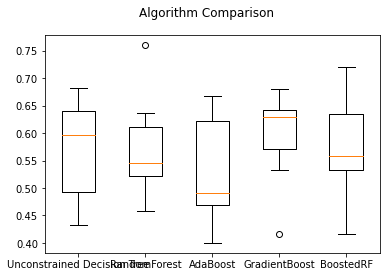

In [11]:
# evaluate each model in turn
results = []
names = []
scoring = 'recall'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), cv_results.var())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [12]:
results

[array([0.46875   , 0.68181818, 0.64705882, 0.43333333, 0.59259259,
        0.56666667, 0.64285714, 0.6       , 0.45833333, 0.63333333]),
 array([0.625     , 0.63636364, 0.55882353, 0.53333333, 0.51851852,
        0.5       , 0.57142857, 0.76      , 0.45833333, 0.53333333]),
 array([0.46875   , 0.5       , 0.47058824, 0.4       , 0.48148148,
        0.66666667, 0.57142857, 0.64      , 0.45833333, 0.66666667]),
 array([0.625     , 0.63636364, 0.61764706, 0.53333333, 0.55555556,
        0.63333333, 0.64285714, 0.68      , 0.41666667, 0.66666667]),
 array([0.5625    , 0.63636364, 0.52941176, 0.53333333, 0.55555556,
        0.53333333, 0.71428571, 0.72      , 0.41666667, 0.63333333])]